# Coherence of HD20794

### Important Note

Change the path in <tt>sys.path.insert()</tt> to wherever the NWelch source code resides on your machine.

Coherence made for RV & FWHM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

import sys
sys.path.insert(0, '/Users/andrewandmatthewfonseca/NWelch/src/')

import TimeSeries
import Bivariate as Bi
from scipy.stats import chi2

### Fonts and Sizes

Here we keep variables to have consistent fonts and plot sizes throughout this analysis. 

In [2]:
# Fonts and Sizes
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

### HD20794 Dataset

The data table for HD20794's star activity indicators reported by <a href="https://arxiv.org/abs/2501.17092v1">Nari et al. (2025)</a>.

In [3]:
data = pd.read_csv('HD20794_ESPRESSO_Nari2025.txt', delim_whitespace=True, comment='#')
data
# Excluded negative RV values, and a high Halpha value (0.220779)

JD            RV      e_RV         FWHM    e_FWHM    BisSpan  \
0    58721.822809  87818.159175  0.090326  5974.056716  0.180651 -59.882622   
1    58721.824476  87817.782310  0.093716  5973.835141  0.187432 -59.453455   
2    58721.826104  87818.804701  0.090787  5973.880441  0.181574 -59.816323   
3    58721.827747  87818.684431  0.089394  5974.111450  0.178788 -59.486164   
4    58721.829403  87818.987557  0.093280  5973.271262  0.186560 -59.057198   
..            ...           ...       ...          ...       ...        ...   
640  60029.486014  87819.197438  0.148449  5977.835409  0.296899 -58.919196   
641  60029.487096  87818.501529  0.148934  5977.502660  0.297869 -58.447920   
642  60029.488182  87819.361491  0.150475  5978.075090  0.300949 -58.924350   
643  60029.489293  87818.848789  0.191174  5977.131737  0.382348 -58.477668   
644  60029.490387  87818.180119  0.243953  5975.932280  0.487905 -57.471604   

     e_BisSpan   Contrast  e_Contrast       SMW     e_SMW        Ha      e_Ha  \
0     0.180651  54.543802    0.001649  0.167338  0.000011  0.202355  0.000004   
1     0.187432  54.551916    0.001712  0.166872  0.000011  0.202510  0.000005   
2     0.181574  54.547035    0.001658  0.167652  0.000011  0.202284  0.000004   
3     0.178788  54.549863    0.001633  0.167359  0.000010  0.202205  0.000004   
4     0.186560  54.551485    0.001704  0.166940  0.000011  0.202575  0.000005   
..         ...        ...         ...       ...       ...       ...       ...   
640   0.296899  54.508187    0.002707  0.166376  0.000026  0.204990  0.000009   
641   0.297869  54.520890    0.002717  0.166093  0.000027  0.204603  0.000009   
642   0.300949  54.511588    0.002744  0.166148  0.000027  0.204725  0.000009   
643   0.382348  54.547089    0.003489  0.165208  0.000042  0.205059  0.000013   
644   0.487905  54.596380    0.004458  0.161950  0.000065  0.204170  0.000018   

           Na      e_Na       BERV  
0    0.267748  0.000003  12.749650  
1    0.267956  0.000004  12.746601  
2    0.267709  0.000003  12.743609  
3    0.268087  0.000003  12.740570  
4    0.268006  0.000004  12.737493  
..        ...       ...        ...  
640  0.259514  0.000007  -6.543304  
641  0.259403  0.000007  -6.544136  
642  0.260037  0.000007  -6.544958  
643  0.259380  0.000010  -6.545786  
644  0.259097  0.000014  -6.546589  

[645 rows x 16 columns]

JD            RV      e_RV         FWHM    e_FWHM    BisSpan  \
0    58721.822809  87818.159175  0.090326  5974.056716  0.180651 -59.882622   
1    58721.824476  87817.782310  0.093716  5973.835141  0.187432 -59.453455   
2    58721.826104  87818.804701  0.090787  5973.880441  0.181574 -59.816323   
3    58721.827747  87818.684431  0.089394  5974.111450  0.178788 -59.486164   
4    58721.829403  87818.987557  0.093280  5973.271262  0.186560 -59.057198   
..            ...           ...       ...          ...       ...        ...   
640  60029.486014  87819.197438  0.148449  5977.835409  0.296899 -58.919196   
641  60029.487096  87818.501529  0.148934  5977.502660  0.297869 -58.447920   
642  60029.488182  87819.361491  0.150475  5978.075090  0.300949 -58.924350   
643  60029.489293  87818.848789  0.191174  5977.131737  0.382348 -58.477668   
644  60029.490387  87818.180119  0.243953  5975.932280  0.487905 -57.471604   

     e_BisSpan   Contrast  e_Contrast       SMW     e_SMW        Ha      e_Ha  \
0     0.180651  54.543802    0.001649  0.167338  0.000011  0.202355  0.000004   
1     0.187432  54.551916    0.001712  0.166872  0.000011  0.202510  0.000005   
2     0.181574  54.547035    0.001658  0.167652  0.000011  0.202284  0.000004   
3     0.178788  54.549863    0.001633  0.167359  0.000010  0.202205  0.000004   
4     0.186560  54.551485    0.001704  0.166940  0.000011  0.202575  0.000005   
..         ...        ...         ...       ...       ...       ...       ...   
640   0.296899  54.508187    0.002707  0.166376  0.000026  0.204990  0.000009   
641   0.297869  54.520890    0.002717  0.166093  0.000027  0.204603  0.000009   
642   0.300949  54.511588    0.002744  0.166148  0.000027  0.204725  0.000009   
643   0.382348  54.547089    0.003489  0.165208  0.000042  0.205059  0.000013   
644   0.487905  54.596380    0.004458  0.161950  0.000065  0.204170  0.000018   

           Na      e_Na       BERV  
0    0.267748  0.000003  12.749650  
1    0.267956  0.000004  12.746601  
2    0.267709  0.000003  12.743609  
3    0.268087  0.000003  12.740570  
4    0.268006  0.000004  12.737493  
..        ...       ...        ...  
640  0.259514  0.000007  -6.543304  
641  0.259403  0.000007  -6.544136  
642  0.260037  0.000007  -6.544958  
643  0.259380  0.000010  -6.545786  
644  0.259097  0.000014  -6.546589  

[645 rows x 16 columns]

### Stellar signals

These are variables holding the periods for a number of planets, with some being possible signals for planets. Specifically, planets c, f, and g are possible planet signals. These are found in the paper linked above.

In [4]:
# Stellar signals
pb = 18.33 # planet b
pc = 43.17 # planet c (possible)
pld = 88.90 # planet d (Changed pd to pld to not conflict with pandas import)
pe = 147.02 # planet e
pf = 331.41 # planet f (possible)
pg = 11.86 # planet g (possible)

In [5]:
# Arrays for loops
planets = [1/pb, 1/pc, 1/pld, 1/pe, 1/pf, 1/pg, 1/33]
planet_labels = ['b (1/18.33)', 'c (1/43.17)', 'd (1/88.90)', 'e (1/147.02)', 'f (1/331.41)', 'g (1/11.86)', '1/33']
planet_letters = ['b', 'c', 'd', 'e', 'f', 'g', '1/33']
color_array = ['red', 'yellow', 'green', 'orange', 'purple', 'navy', 'magenta']
FAP_color_array = ['red', 'blue', 'green']

In [6]:
# Function for vertical lines
def freq_vlines():
    for p, p_l, c_a in zip(planets, planet_labels, color_array):
        plt.axvline(p, linestyle='--', color=c_a, alpha=0.7, label=p_l)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [7]:
def freq_vlines_text():
    for p, p_l, c_a in zip(planets, planet_letters, color_array):
        plt.text(p, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05, p_l, color=c_a, fontsize=text_font, 
                 verticalalignment='bottom', horizontalalignment='center', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

In [8]:
def rayleigh_shading(rayleigh):
    for i in planets:
        plt.fill_between([i - rayleigh, i + rayleigh], [-7,-7], [7, 7], color='goldenrod', alpha=0.3)

<font size=10><p style="text-align:center"> RV & FWHM (Three-Segmentation) </font></p>

## RV & FWHM TimeSeries Objects

Creating TimeSeries objects and outputing various estimates of the Nyquist-like frequency, which is the highest frequency about which your data contain reliable information. The Rayleigh resolution is the lowest frequency about which your time series contains information. Prints the number of rows in the dataset, which will be used later for fake data iteration.

In [9]:
fwhm = TimeSeries.TimeSeries(data['JD'].to_numpy(), data['FWHM'].to_numpy())
rv = TimeSeries.TimeSeries(data['JD'].to_numpy(), data['RV'].to_numpy(), display_frequency_info=False)
print("# of rows in dataset: ", fwhm.N)

Nyquist frequency from mean dt: 0.24624
Nyquist frequency from 10% trimmed mean dt: 2.39524
Nyquist frequency from 20% trimmed mean dt: 354.87284
Nyquist frequency from median dt: 430.63169
Rayleigh resolution: 0.00076
# of rows in dataset:  645
Nyquist frequency from mean dt: 0.24624
Nyquist frequency from 10% trimmed mean dt: 2.39524
Nyquist frequency from 20% trimmed mean dt: 354.87284
Nyquist frequency from median dt: 430.63169
Rayleigh resolution: 0.00076
# of rows in dataset:  645


<Axes: xlabel='JD', ylabel='RV'>

<Axes: xlabel='JD', ylabel='RV'>

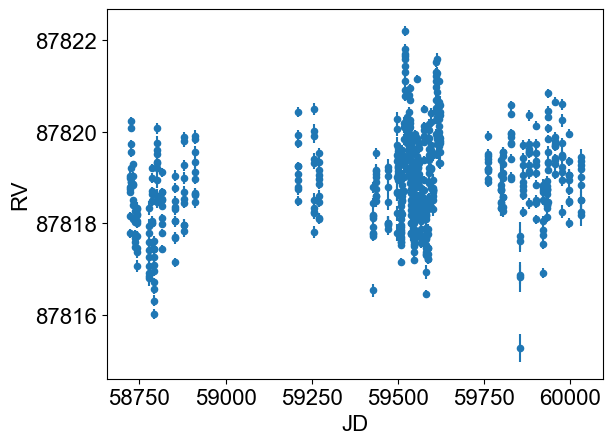

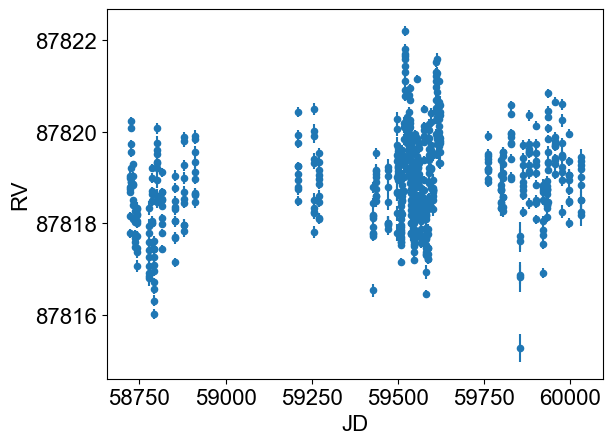

In [10]:
# Scatter plot with errorbars
# There are more points present then before; possibly more data from recent observation?)
data.plot.scatter(x='JD', y='RV', yerr='e_RV')

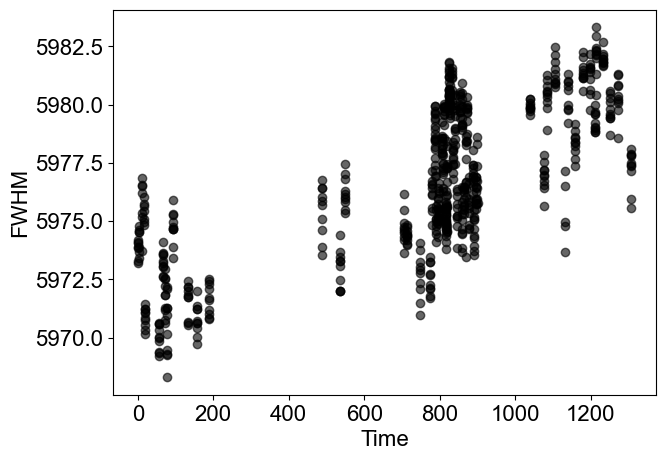

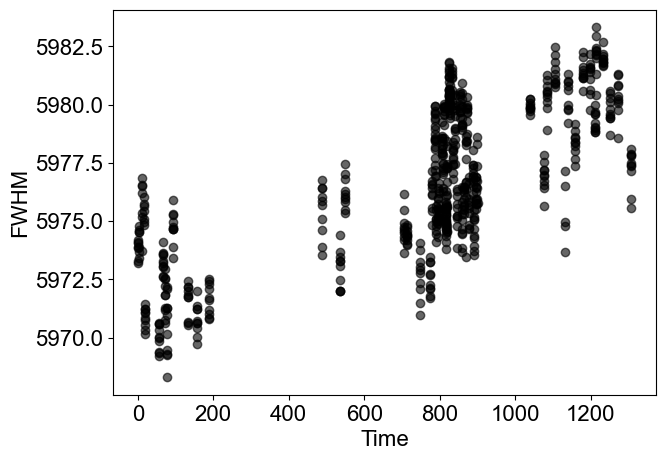

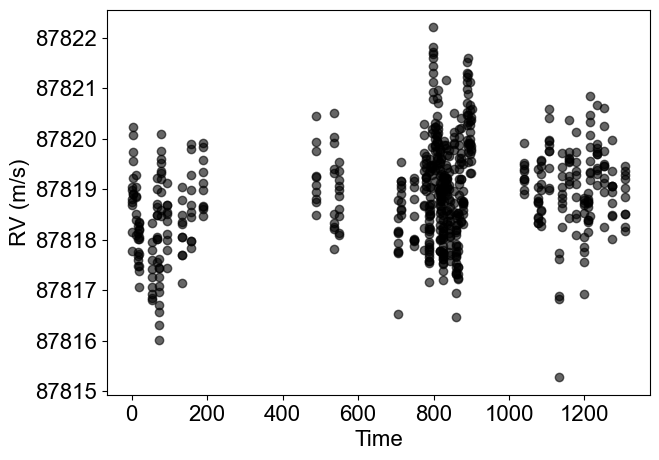

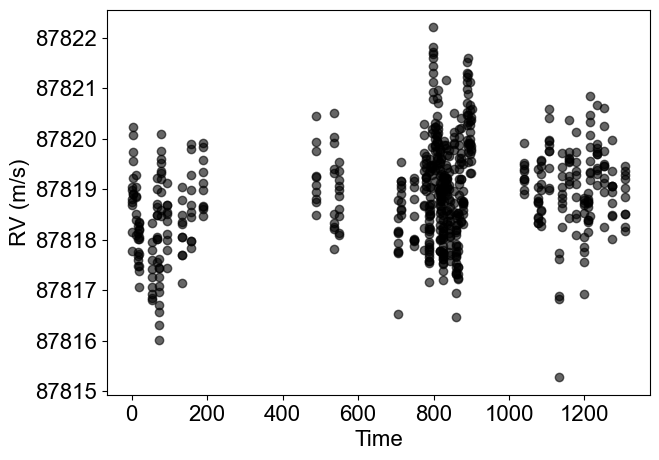

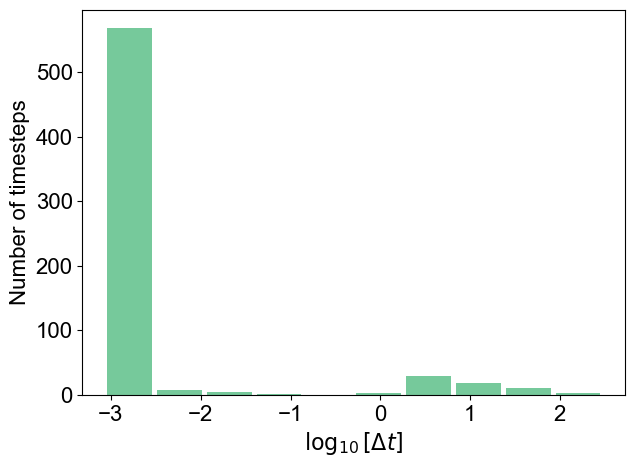

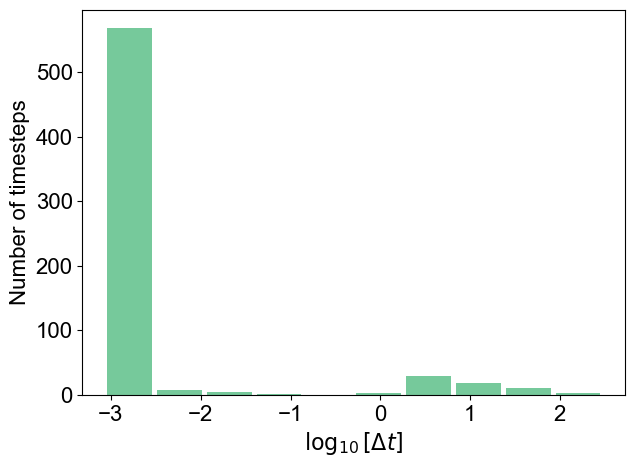

In [11]:
fwhm.scatterplot(ylabel=r"FWHM")
rv.scatterplot(ylabel="RV (m/s)")
rv.dthist()

# color/shade each part of the segmentation

In [12]:
fwhm.frequency_grid(0.5, 3)
rv.frequency_grid(0.5, 3)

fwhm.pow_FT(N_bootstrap=1000)
rv.pow_FT(N_bootstrap=1000)

Iteration 0
Iteration 0
Iteration 500
Iteration 500
Iteration 0
Iteration 0
Iteration 500
Iteration 500


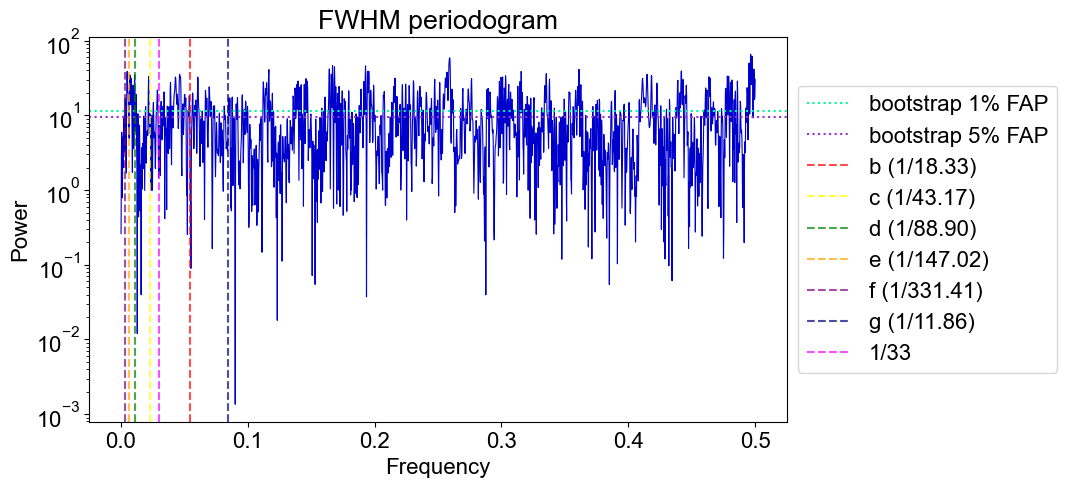

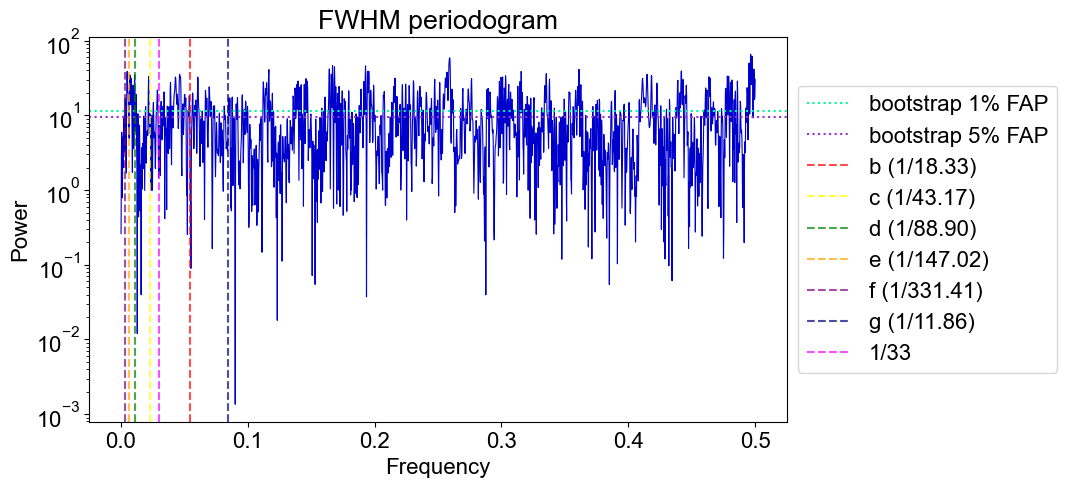

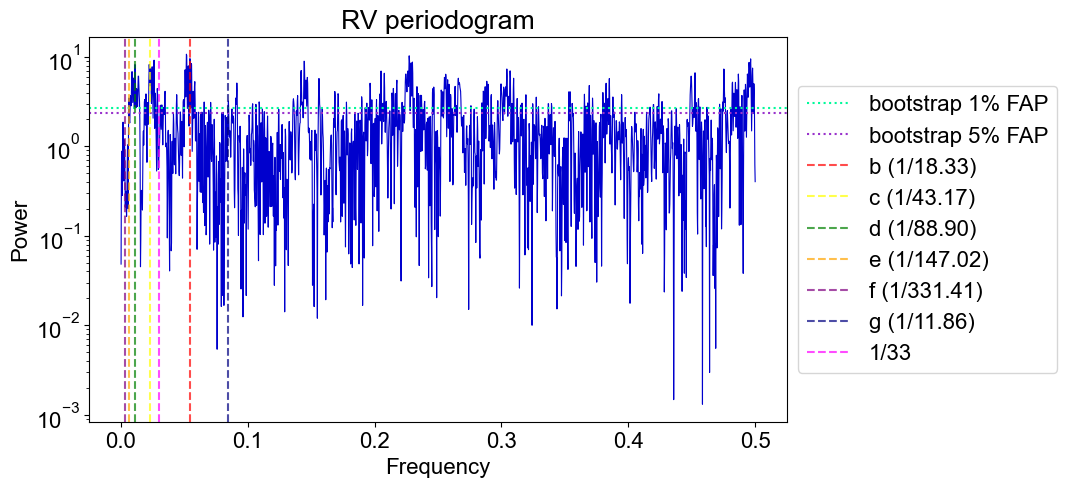

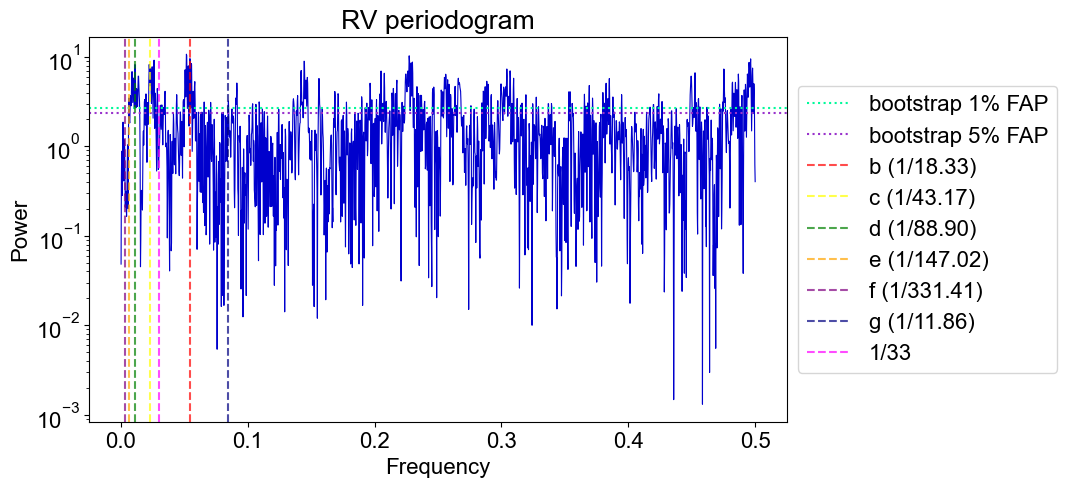

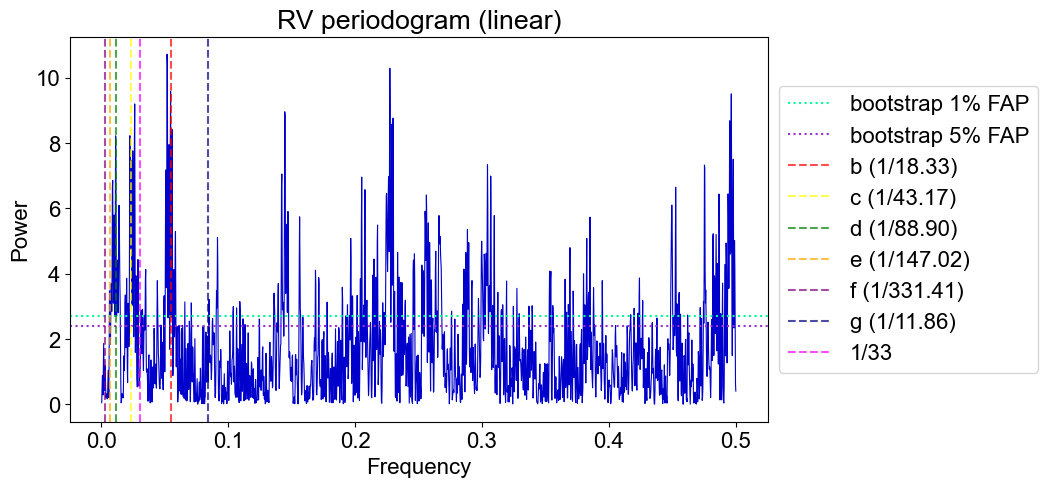

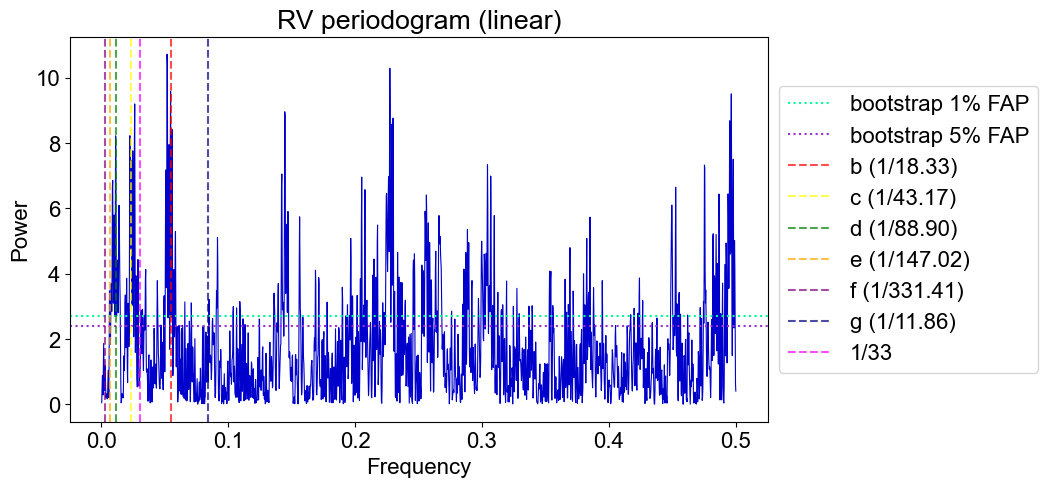

In [13]:
fwhm.powplot(title=r"FWHM periodogram")
freq_vlines()
rv.powplot(title='RV periodogram')
freq_vlines()
rv.powplot(title='RV periodogram (linear)', yscale='linear') 
freq_vlines()

In [14]:
rv.Siegel_test()
fwhm.Siegel_test()

T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00428
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.00034
T threshold for rejecting white noise hypothesis at 5% level: 0.00428
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00428
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.00034
T threshold for rejecting white noise hypothesis at 5% level: 0.00428
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


In [15]:
rv_fwhm = Bi.Bivariate(data['JD'].to_numpy(), data['RV'].to_numpy(), data['FWHM'].to_numpy())
# create more bivariate objects for each individual segmentation array

Nyquist frequency from mean dt: 0.24624
Nyquist frequency from 10% trimmed mean dt: 2.39524
Nyquist frequency from 20% trimmed mean dt: 354.87284
Nyquist frequency from median dt: 430.63169
Rayleigh resolution: 0.00076
Nyquist frequency from mean dt: 0.24624
Nyquist frequency from 10% trimmed mean dt: 2.39524
Nyquist frequency from 20% trimmed mean dt: 354.87284
Nyquist frequency from median dt: 430.63169
Rayleigh resolution: 0.00076


Number of data points per segment: 322
Number of segments: 3
Segment start and end points: [[  0 322]
 [161 483]
 [322 645]]
Effective number of segments: 2.250000
Frequency grid spacing: 0.000203
Minimum 6-dB main lobe half width: 0.001469
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003541
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.001214
Number of data points per segment: 322
Number of segments: 3
Segment start and end points: [[  0 322]
 [161 483]
 [322 645]]
Effective number of segments: 2.250000
Frequency grid spacing: 0.000203
Minimum 6-dB main lobe half width: 0.001469
Mean 6-dB main lobe half width (1/2 resolution limit): 0.003541
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.001214
Number of data points per segment: 322
Number of segments: 3
Segment start and end points: [[  0 322]
 [161 483]
 [322 645]]
Effective number of segments: 2.250000
Frequency grid spacing: 0.000203
Minimum 6-dB main lobe half width: 0.001469
M

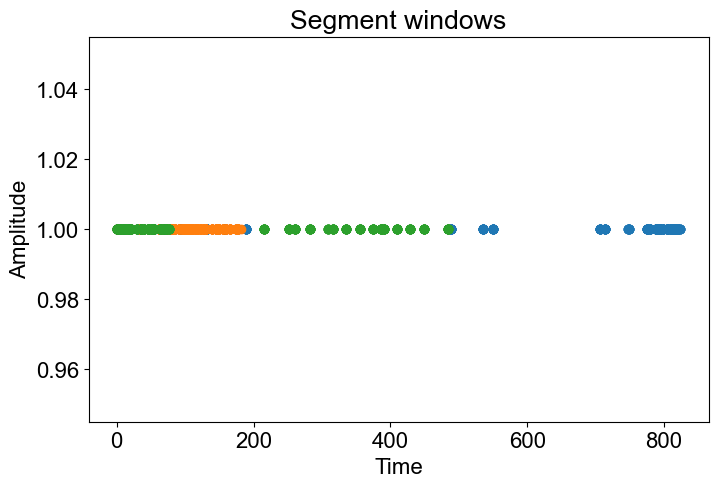

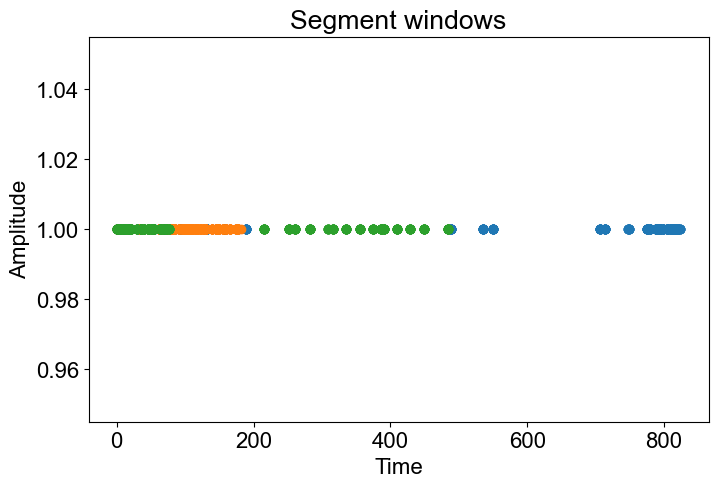

In [16]:
rv_fwhm.segment_data(3, 0.2, oversample=6, plot_windows=True)

In [17]:
rv_fwhm.Welch_coherence_powspec()
#rv_fwhm.Welch_coherence_powspec_bootstrap(N_coh_bootstrap=1000)
# For analytical data, the bootstrap isn't necessary, as it is useful for non-analytical data to estimate the distribution of relevant statistics.

In [18]:
rv_fwhm.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00705
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00705
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00705
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00705
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


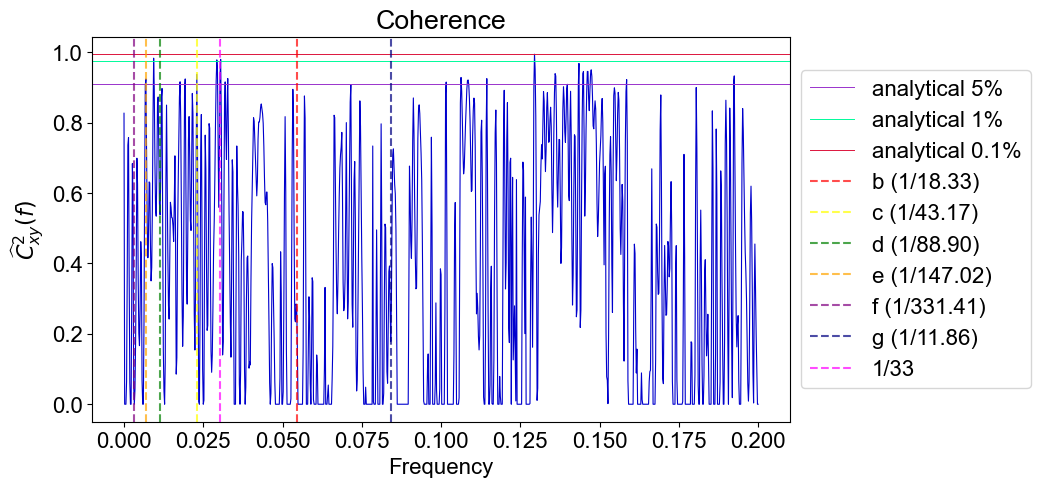

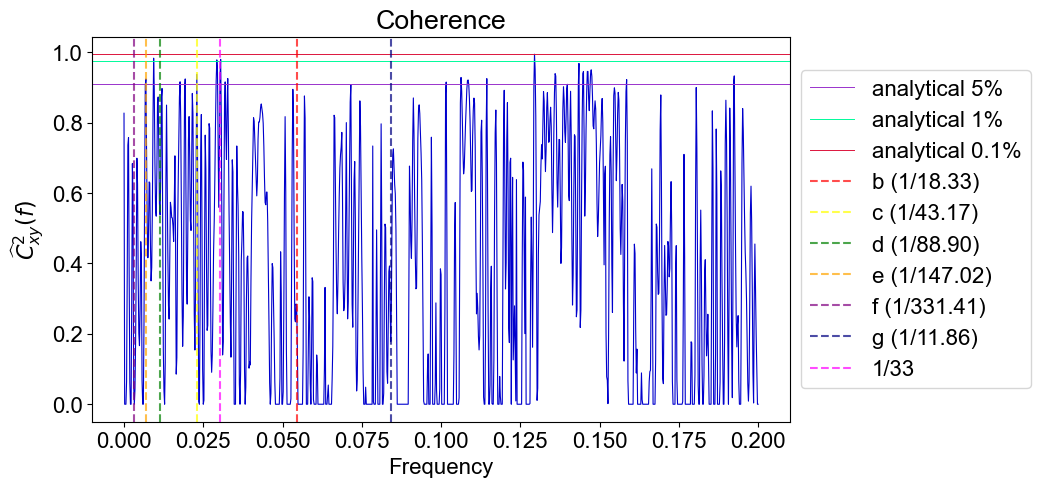

In [19]:
rv_fwhm.coh_plot(show_theoretical_thresholds=True)
freq_vlines()

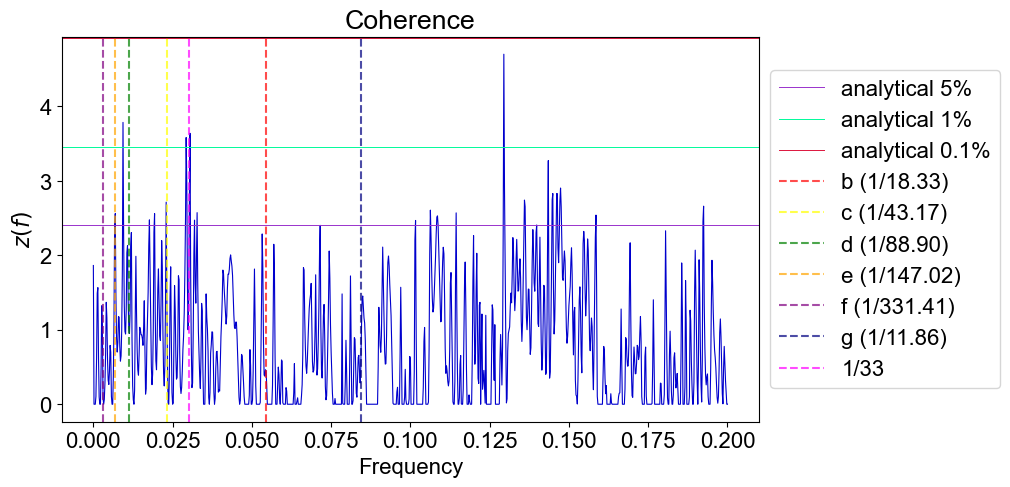

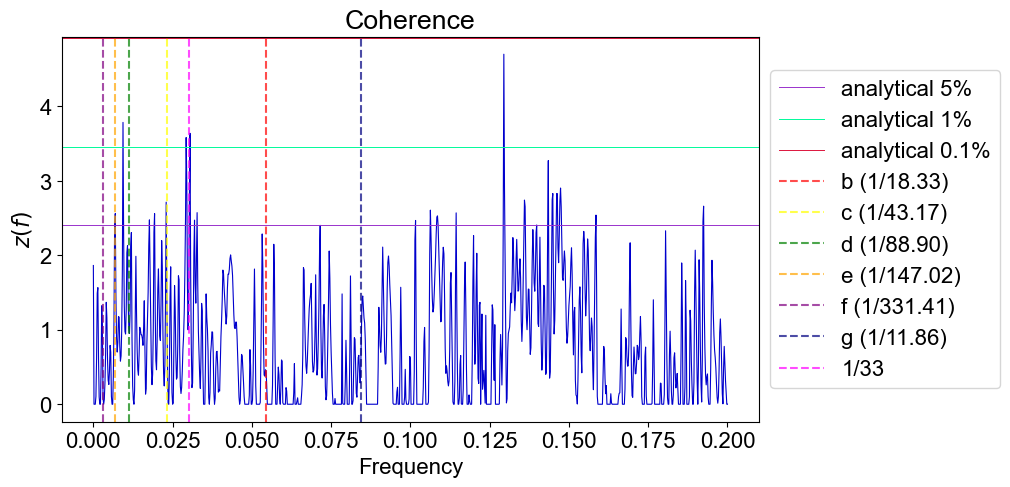

In [20]:
rv_fwhm.coh_plot(transformed=True, show_theoretical_thresholds=True, show_boot_thresholds=False)
freq_vlines()

Half bandwidth: 0.004268
Welch average spectral window not saved to file
Half bandwidth: 0.004268
Welch average spectral window not saved to file
Half bandwidth: 0.004268
Welch average spectral window not saved to file
Half bandwidth: 0.004268
Welch average spectral window not saved to file


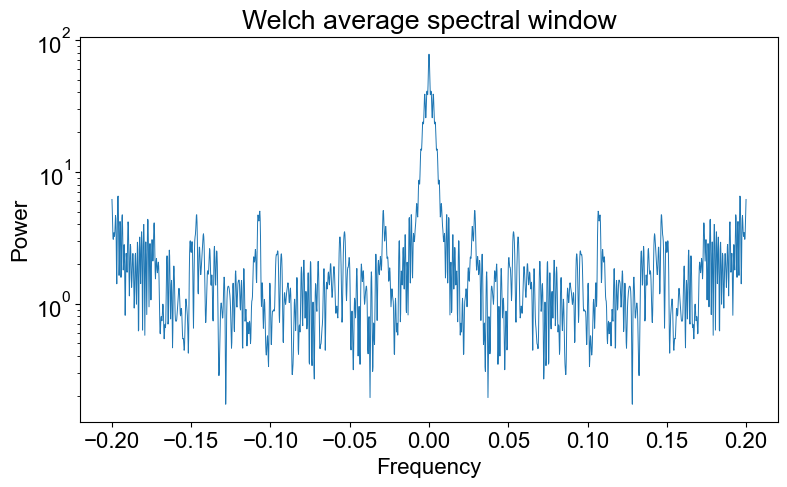

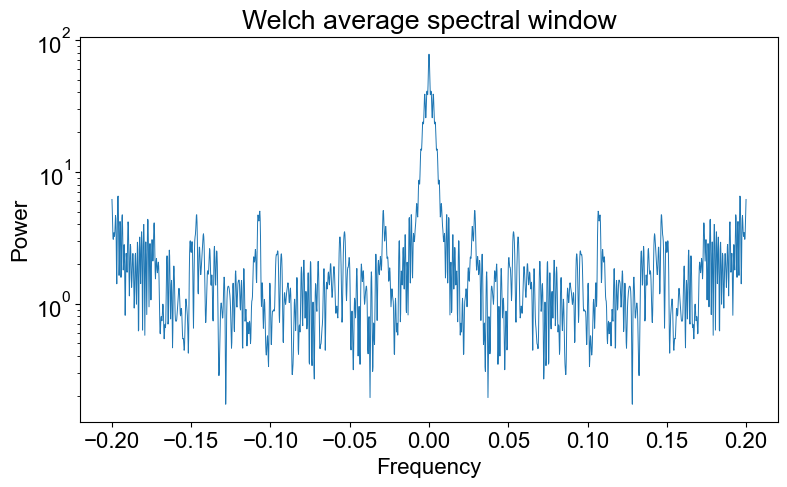

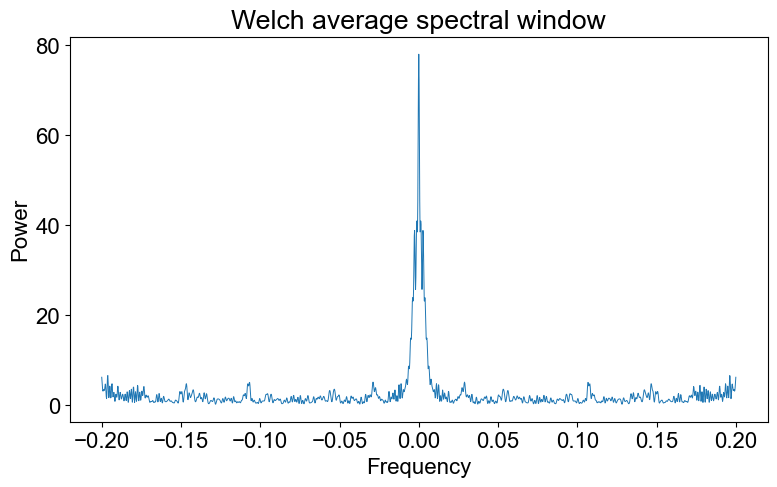

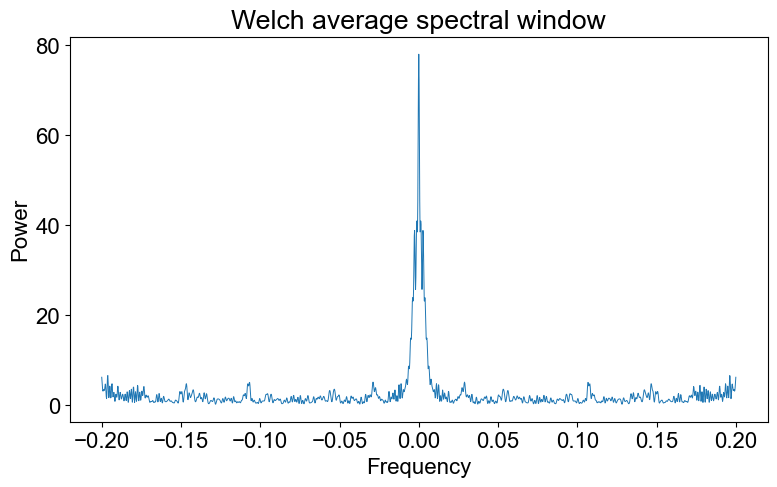

In [21]:
rv_fwhm.x_series.spectral_window_Welch()
rv_fwhm.x_series.spectral_window_Welch(yscale='linear')

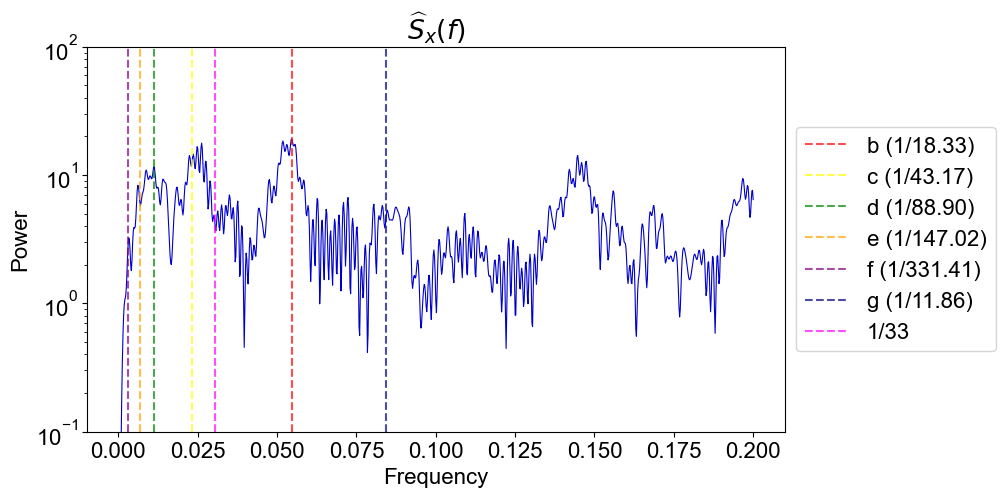

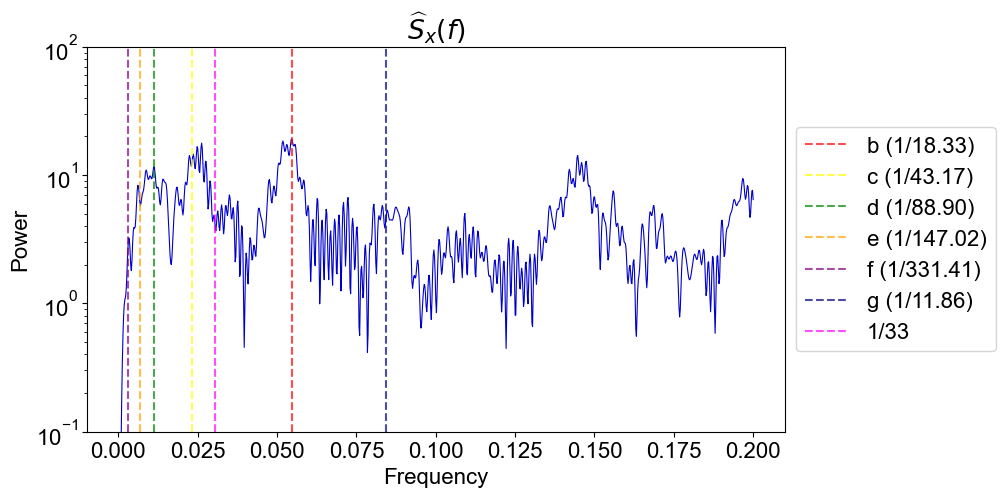

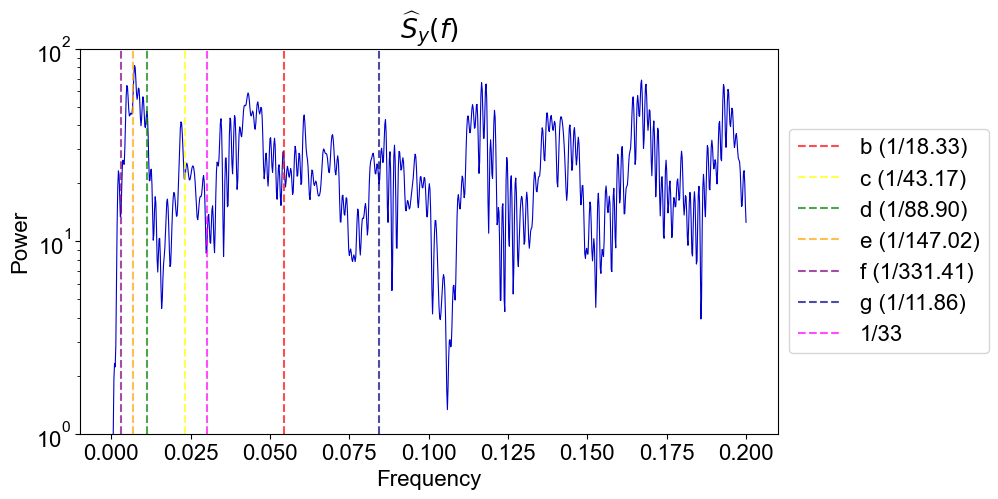

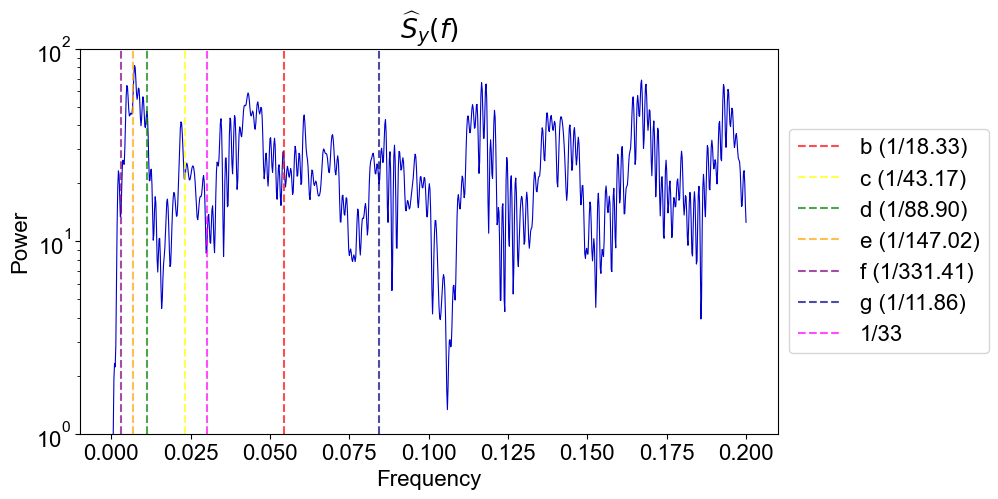

In [22]:
rv_fwhm.Welch_pow_plot()
plt.ylim(1e-1, 1e2)
freq_vlines()
rv_fwhm.Welch_pow_plot(x_or_y='y',)
plt.ylim(1e0, 1e2)
freq_vlines()
# Use plt.ylim to create y limit to get better looking plot

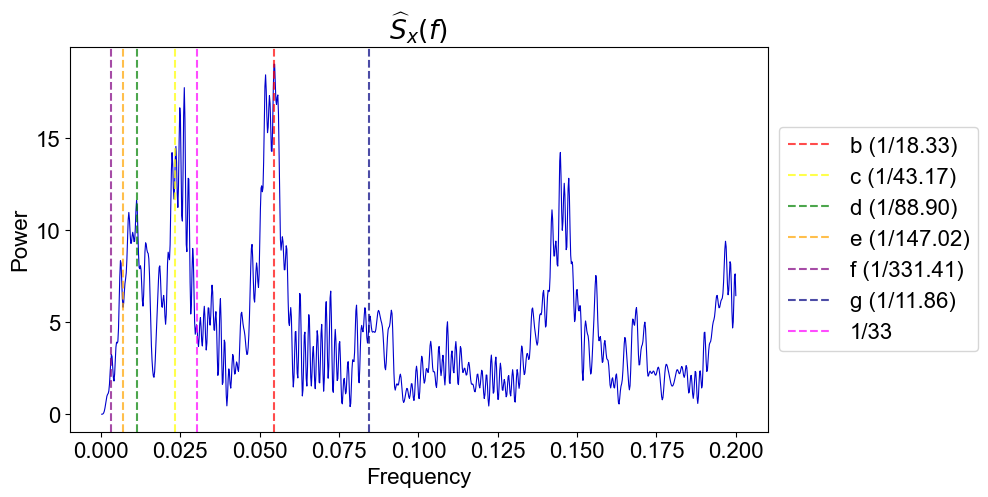

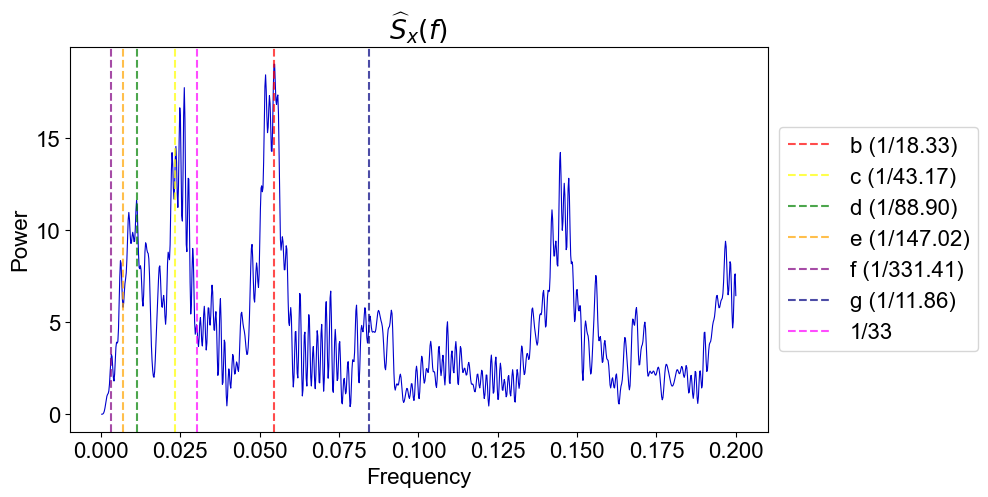

In [23]:
rv_fwhm.Welch_pow_plot(yscale='linear')
freq_vlines()

In [24]:
pow_fwhm = LombScargle(data['JD'].to_numpy(), data['FWHM'].to_numpy(), normalization='psd').power(rv_fwhm.pow_coh_grid)
pow_rv = LombScargle(data['JD'].to_numpy(), data['RV'].to_numpy(), normalization='psd').power(rv_fwhm.pow_coh_grid)

In [25]:
frot_measured = rv_fwhm.y_series.Welch_powgrid[np.argmax(rv_fwhm.y_series.Welch_pow)]
print('Measured rotation period:', 1/frot_measured)

Measured rotation period: 136.66666666666706
Measured rotation period: 136.66666666666706


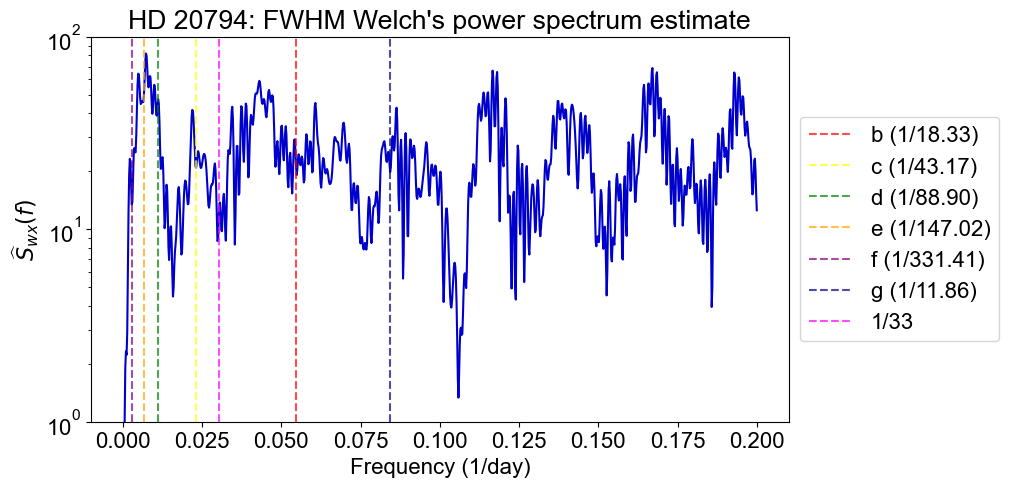

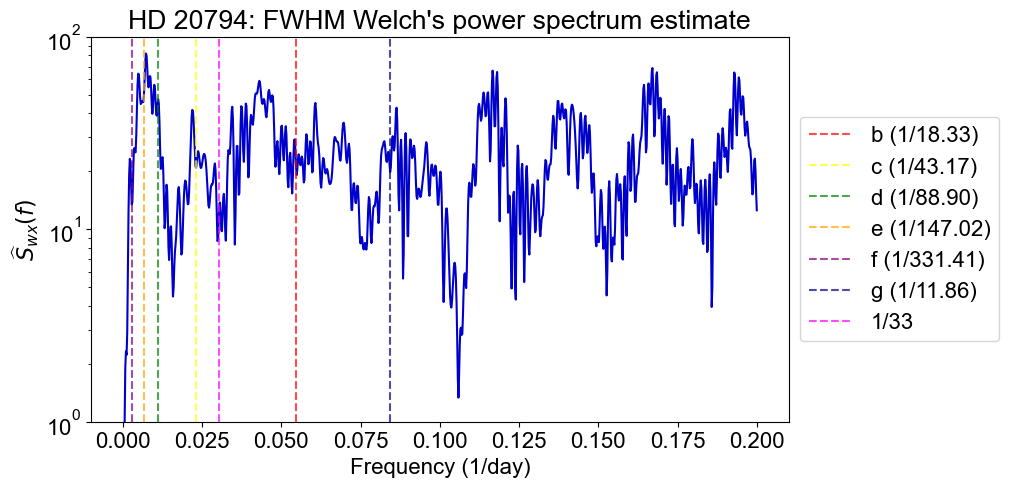

In [26]:
plt.figure(figsize=figsize)
plt.semilogy(rv_fwhm.pow_coh_grid, rv_fwhm.y_series.Welch_pow, color='mediumblue')
#plt.axhline(rv_fwhm.ypow_Welch_false_alarm_01, color='crimson', ls=':', label='0.1%') # Need 10000 iteration on bootstrap; set to 1000 for now
#plt.axhline(rv_fwhm.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='1%')
#plt.axhline(rv_fwhm.ypow_Welch_false_alarm_5, color='darkorchid', ls=':', label='5%')

#for s in [frot_measured, 2*frot_measured]:
#    plt.axvline(s, color='k', ls='-.')
    
#for n in range(6):
#    if n == 0:
#        plt.axvline(planets[n], color='k', ls='-.', label='Planets')
#    else:
#        plt.axvline(planets[n], color='k', ls='-.')

plt.ylim(1e0, 1e2)
#plt.axvline(3*frot_measured, color='k', ls='-', label='meas. rotation and harmonics')
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\widehat{S}_{wx}(f)$")
plt.title(r"HD 20794: FWHM Welch's power spectrum estimate")
freq_vlines()

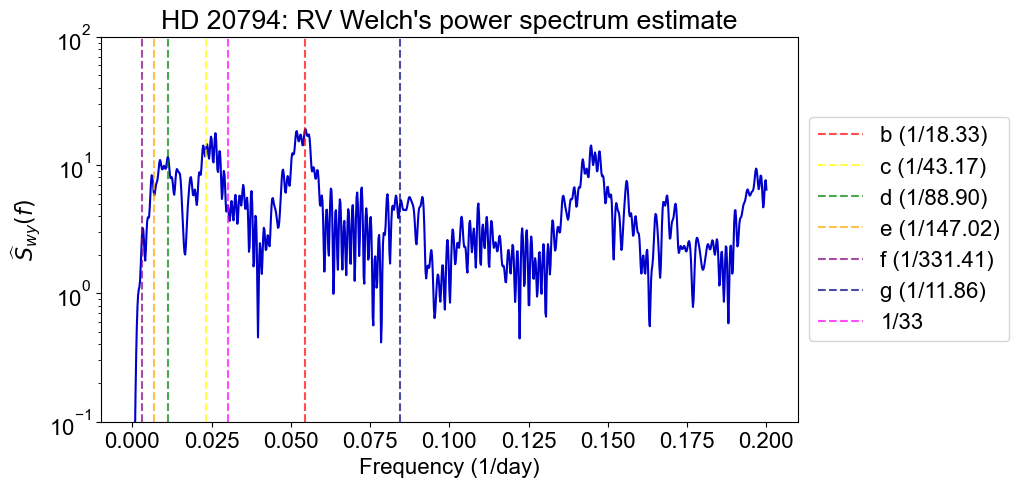

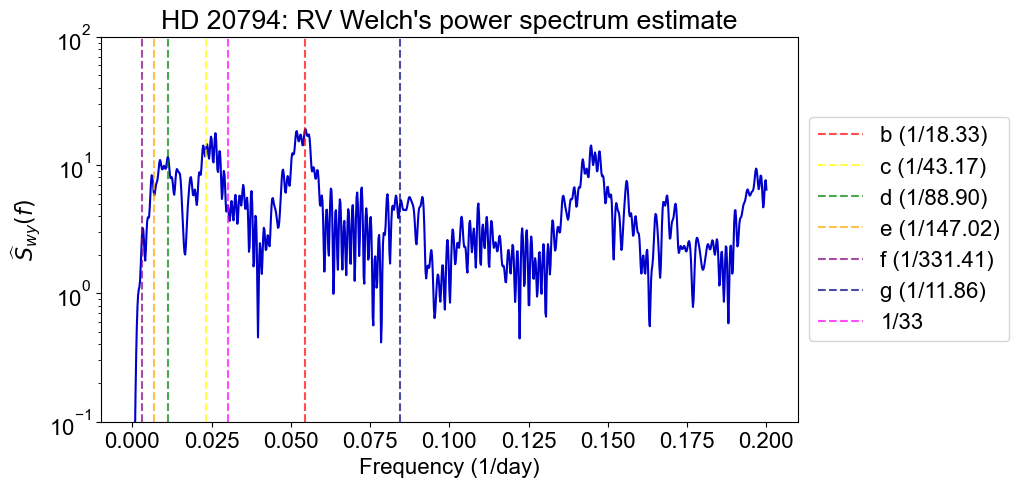

In [27]:
plt.figure(figsize=figsize)
plt.semilogy(rv_fwhm.pow_coh_grid, rv_fwhm.x_series.Welch_pow, color='mediumblue')
#plt.axhline(rv_fwhm.x_series.Welch_false_alarm_1 , color='crimson', ls=':', label='0.1%')
#plt.axhline(rv_fwhm.xpow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='1%')
#plt.axhline(rv_fwhm.xpow_Welch_false_alarm_5, color='darkorchid', ls=':', label='5%')

#for n in range(6):
#    if n == 0:
#       plt.axvline(planets[n], color='k', ls='-.', label='Planets')
#    else:
#        plt.axvline(planets[n], color='k', ls='-.')
        
plt.ylim(1e-1, 1e2)
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\widehat{S}_{wy}(f)$")
plt.title(r"HD 20794: RV Welch's power spectrum estimate")
freq_vlines()

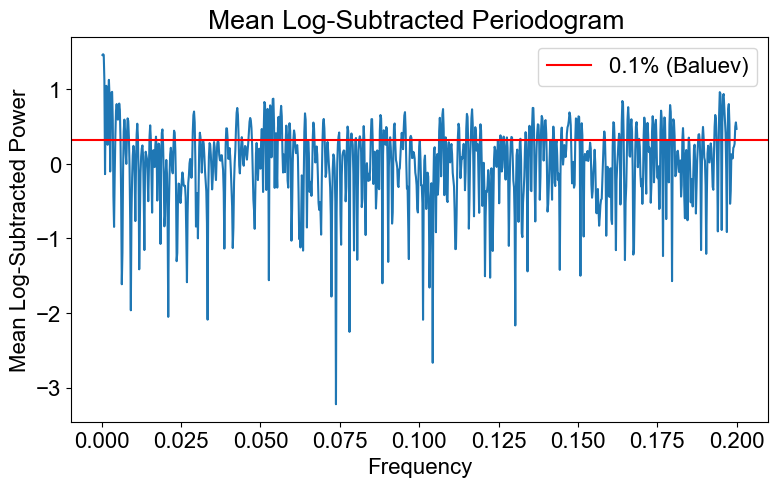

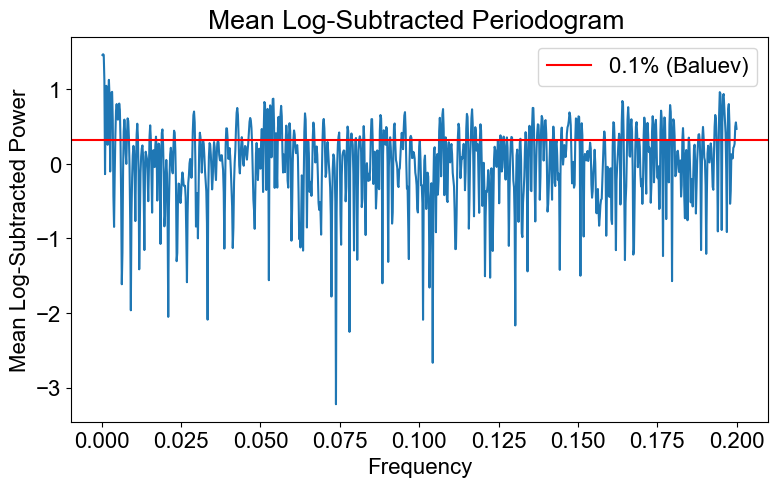

In [28]:
# Creating Mean Log-Subtracted Periodogram
ls = LombScargle(data['JD'].to_numpy(), data['FWHM'].to_numpy(), normalization='psd')
power = ls.power(rv_fwhm.pow_coh_grid[1:])
# Clarity on using standard/default frequency grid, or the rv_fwhm.pow_coh_grid frequency grid. 
log_power = np.log10(power)
mean_log_power = np.mean(log_power)
log_power_subtracted = log_power - mean_log_power

false_alarm_threshold = ls.false_alarm_level(0.01, method='bootstrap')

plt.figure(figsize=figsize)
plt.plot(rv_fwhm.pow_coh_grid[1:], log_power_subtracted)
plt.title('Mean Log-Subtracted Periodogram ')
plt.axhline(np.log10(false_alarm_threshold) - mean_log_power, color='red', label='0.1% (Baluev)')
plt.xlabel('Frequency')
plt.ylabel('Mean Log-Subtracted Power')
plt.legend()
plt.show()

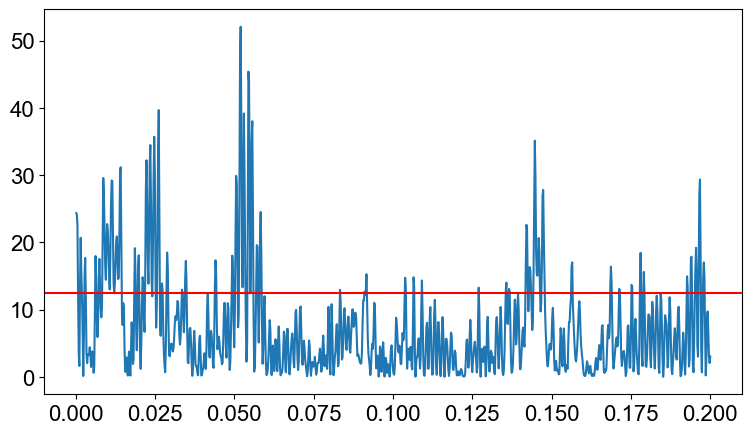

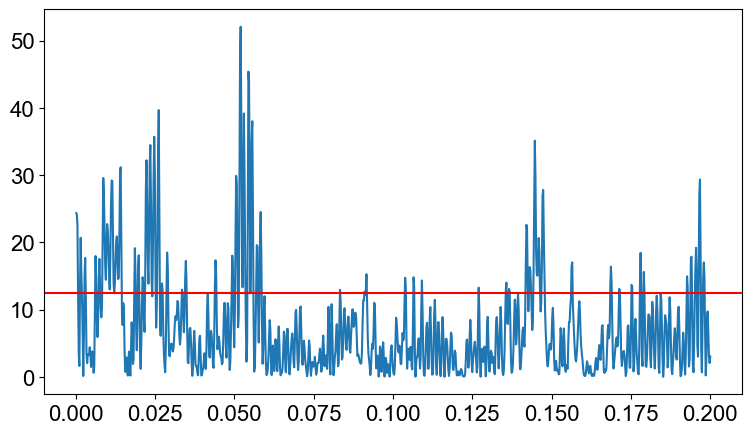

In [29]:
ls = LombScargle(data['JD'].to_numpy(), data['RV'].to_numpy(), normalization='psd')
power = ls.power(rv_fwhm.pow_coh_grid[1:])
plt.figure(figsize=figsize)
plt.plot(rv_fwhm.pow_coh_grid[1:], power)
false_alarm_threshold = ls.false_alarm_level(0.01, method='bootstrap')
plt.axhline(false_alarm_threshold, color='red', label='0.1% (Baluev)')

In [30]:
rayleigh_ls = 1/(data['JD'].to_numpy()[-1] - data['JD'].to_numpy()[0])

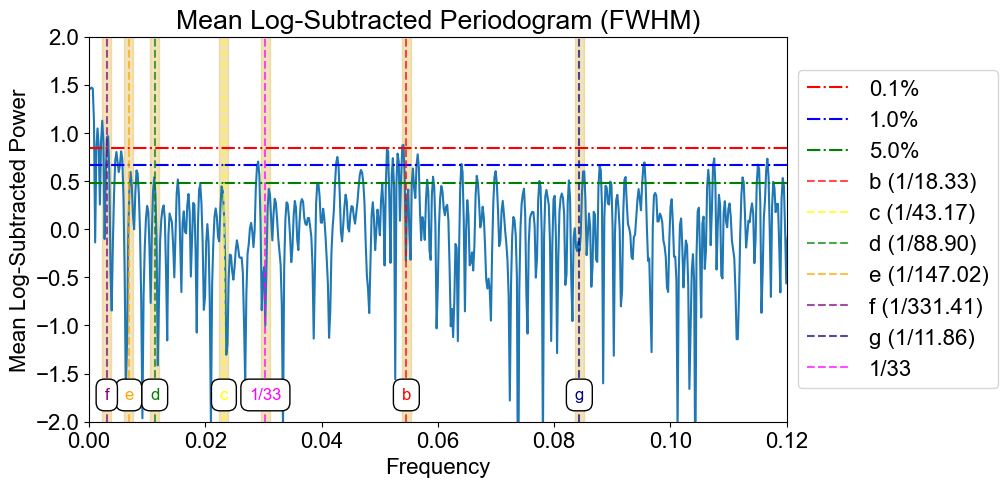

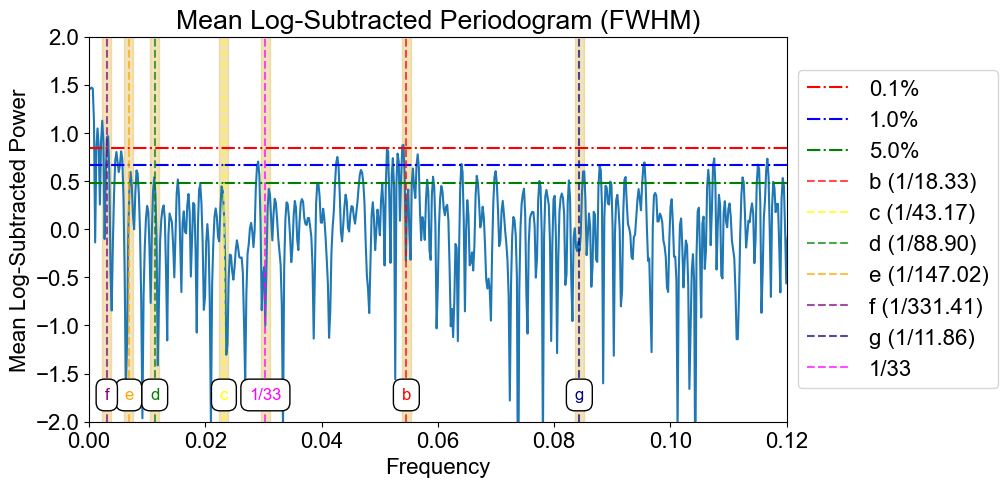

In [31]:
# Whitening (only whiten when the mean log-subtracted periodogram is not flat)
quantiles = [0.001, 0.01, 0.05]
df = 2
chi2_FALs = chi2.isf(quantiles, df) / 2
plt.figure(figsize=figsize)
plt.plot(rv_fwhm.pow_coh_grid[1:], log_power_subtracted)
for i, q in enumerate(chi2_FALs):
    plt.axhline(np.log10(q), color=FAP_color_array[i], label=f"{100*quantiles[i]}"+"%", ls='-.')
plt.ylim(-2,2)
plt.xlim(0,0.12)
plt.title('Mean Log-Subtracted Periodogram (FWHM)')
plt.xlabel('Frequency')
plt.ylabel('Mean Log-Subtracted Power')
rayleigh_shading(rayleigh_ls)
freq_vlines_text()
freq_vlines()
# Create a similar plot for the RVs and the rest of the activity indicators for ESPRESSO and HARPS.